# Linear Regression

By Jen Selby and Carl Shan

This Jupyter Notebook will introduce to you to how to make a Linear Regression model using the Sci-kit Learn (aka `sklearn`) Python library.

You can see basic example here:
> http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

and full documentation of the sklearn linear_model module here:
> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

## Setup

First, make sure you have installed all of the necessary Python libraries, following [the instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3).

Next, we want to make sure we can display our graphs in this notebook and import all of the libraries we'll need into the notebook.

In [1]:
# We're going to be doing some plotting, and we want to be able to see these plots.
# To display graphs in this notebook, run this cell.
%matplotlib inline

In [2]:
# We're now going to import some important libraries

import numpy.random # for generating a noisy data set
from sklearn import linear_model # for training a linear model

import matplotlib.pyplot # for plotting in general
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting

import pandas as pd

## Fake Data Generation

We're going to generate some fake data to test out our ideas about linear regression. These constant variables decide some of the characteristics of our data: the `x` range (which will also be used to set the size of the graph later) and how many inputs we should generate.

In [3]:
# Setting the limits and number of our first, X, variable

MIN_X = -10
MAX_X = 10
NUM_INPUTS = 50

### Fake Dataset 1

Our first dataset has just one input feature. We are going to pick out 50 random real numbers between our min and max. Then, we will generate one output for each of these inputs following the function $y = 0.3x + 1$.

To make this look like real data, we will add a bit of of noise to it. 

**Note:** We can generate some noise by picking numbers in a [normal distribution (also called bell curve)](http://www.statisticshowto.com/probability-and-statistics/normal-distributions/) around zero.

In [4]:
# randomly pick numbers for x
x1 = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 1))

print(x1)

[[ 9.67299156]
 [ 9.84086608]
 [ 7.56755415]
 [-1.20360608]
 [ 7.37485364]
 [-2.25928244]
 [ 7.86601105]
 [ 1.05376746]
 [-3.98377628]
 [ 6.25402405]
 [-2.2501684 ]
 [-4.10956826]
 [ 1.79453967]
 [ 1.09253542]
 [-5.52854481]
 [ 1.11328237]
 [ 4.42883286]
 [-6.49696722]
 [-9.99754871]
 [ 4.29639179]
 [-8.0849187 ]
 [ 2.77335267]
 [ 3.71233652]
 [ 7.06230005]
 [ 0.40423516]
 [-2.10373762]
 [ 1.92146605]
 [-2.33795002]
 [ 5.58508323]
 [-6.54372414]
 [ 7.61518427]
 [ 0.01286191]
 [-1.41313623]
 [ 2.21783145]
 [ 8.4450263 ]
 [ 7.36602547]
 [-8.91568502]
 [-9.2030912 ]
 [-2.47497544]
 [-7.97871511]
 [ 3.18674541]
 [ 7.27278683]
 [ 5.77604226]
 [ 8.89374588]
 [-2.59583659]
 [ 1.41838915]
 [ 0.21353182]
 [ 9.03872368]
 [ 3.01715394]
 [-2.09896238]]


Let's store this data into a `pandas` `DataFrame` object and name the column `'x'`.

In [5]:
data = pd.DataFrame(data=x1, columns=['x'])
data.head()

,x
0,9.672992
1,9.840866
2,7.567554
3,-1.203606
4,7.374854


Cool. Now we have some fake `x` data.

Let's make the fake `y` data now.

Let's try to make data that follows the equation: $y = 0.3x + 1$.

In [6]:
data['y'] = 0.3 * data['x'] + 1

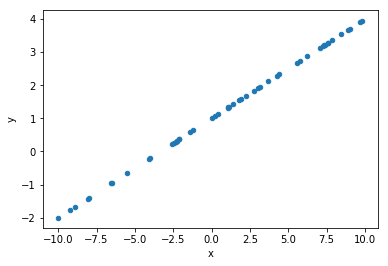

In [7]:
data.plot.scatter(x='x', y='y')

Okay. That looks *too* perfect.

Most data in the real world look less linear than that.

So let's add a little bit of noise.

Otherwise our linear model will be too easy.

**NOTE**: Noise are randomly pertubations to your data that happens naturally in the real world. We will simulate some noise.

In [8]:
# First, let's create some noise to make our data a little bit more spread out.

# generate some normally distributed noise
noise = numpy.random.normal(size=NUM_INPUTS)

In [9]:
# Now let's create the 'y' variable
# It turns out you can make a new column in pandas just by doing the below.
# It's so simple!
data['y'] = data['y'] + noise

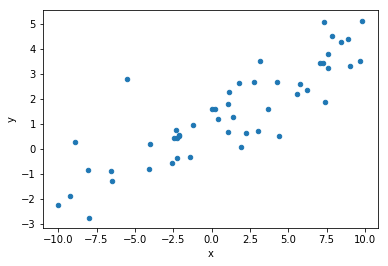

In [10]:
data.plot.scatter(x='x', y='y')

Great!

This looks more like real data now.

## Training

Now that we have our data, we can train our model to find the best fit line. We will use the linear model module from the scikit-learn library to do this.

Note: you may get a warning about LAPACK. According to [this discussion on the scikit-learn github page](https://github.com/scipy/scipy/issues/5998), this is safe to ignore.

In [11]:
# This creates an "empty" linear model

model = linear_model.LinearRegression()


First, we need to reshape our data.

Currently, our data looks like the following:

```python
# data['x'] looks like
[-3.44342026,  9.60082542,  4.99683803,  7.11339915,  9.69287893, ...]

```

In other words, it's just a list.

However, this isn't sufficient.

That's because later on, we will use a command called `.fit()` and this command expects our data to look like a list of lists.

For example:

```python
[[-3.44342026],
[ 9.60082542],
[ 4.99683803],
[ 7.11339915],
[ 9.69287893],
[-5.1383316 ],
[ 8.96638209],
...
[-9.12492363]]
```

We will use a the command `.reshape()`.

In [12]:
# Run this code
x = data['x'].values.reshape(-1, 1)
y = data['y'].values.reshape(-1, 1)

There we go. Now we can "fit" the data.

"Fitting" the data means to give the "empty model" real data and ask it to find the "best parameters" that "best fits" the data.

Using the amazing `sklearn` library, it's as easy as running the `.fit()` command.



In [13]:
# Run this code
model.fit(X=x, y=y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Results and Visualization

Now, let's see what our model learned. We can look at the results numerically:

In [14]:
def print_model_fit(model):
    # Print out the parameters for the best fit line
    print('Intercept: {i}  Coefficients: {c}'.format(i=model.intercept_, c=model.coef_))

In [15]:
print_model_fit(model)

Intercept: [1.12355525]  Coefficients: [[0.29612734]]


In [16]:
## How would this model make predictions?

# Let's make some new data that have the following values and see how to predict their corresponding 'y' values.

# Print out the model's guesses for some values of x
new_x_values = [ [-1.23], [0.66], [1.98] ]

predictions = model.predict(new_x_values)

print(predictions)

[[0.75931862]
 [1.31899929]
 [1.70988738]]


In [17]:
# Let's print them a little bit nicer
for datapoint, prediction in zip(new_x_values, predictions):
    print('Model prediction for {}: {}'.format(datapoint[0], prediction))

Model prediction for -1.23: [0.75931862]
Model prediction for 0.66: [1.31899929]
Model prediction for 1.98: [1.70988738]


We can also look at them graphically.

In [18]:
def plot_best_fit_line(model, x, y):
    # create the figure
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('Data and Best-Fit Line')
    matplotlib.pyplot.xlabel('x values')
    matplotlib.pyplot.ylabel('y values')

    # put the generated dataset points on the graph
    matplotlib.pyplot.scatter(x, y)
    
    # Now we actually want to plot the best-fit line.
    # To simulate that, we'll simply generate all the
    # inputs on the graph and plot that.
    # predict for inputs along the graph to find the best-fit line
    X = numpy.linspace(min(x), max(x)) # generates all the possible values of x
    Y = model.predict(list(zip(X)))
    matplotlib.pyplot.plot(X, Y)
    
#     X = numpy.linspace(MIN_X, MAX_X)
    
#     data = pd.DataFrame(data=list(zip(X)), columns=['x'])
#     data['y'] = 0.3 * data['x'] + 1
#     matplotlib.pyplot.plot(X,list(data['y']))

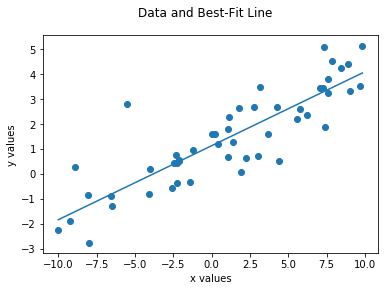

In [19]:
plot_best_fit_line(model, x, y)

# Exercise Option (Standard Difficulty)

Answer the following questions about dataset 1:
1. What output did you expect to see printed if the linear regression code was working, and why?
1. What did you expect to see on the graph if the linear regression code was working, and why?
1. Pick some lines of code that you could change to continue testing that the linear regression worked properly. What lines did you choose and how did you change them? How did the output change, and why does that tell you that the code is working correctly?

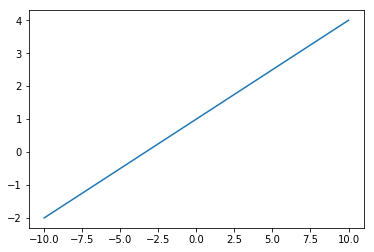

In [20]:
### Your code here
# 1. I would expect the intercept to equal 1, and the coefficient to equal .3
# 2. I would expect the linear regression to roughly mirror the 'line' created by the data points without noise
# 3. We could plot the line of the original by adding the following code to the plot_best_fit_line code:
X = numpy.linspace(MIN_X, MAX_X)
    
data = pd.DataFrame(data=list(zip(X)), columns=['x'])
data['y'] = 0.3 * data['x'] + 1
matplotlib.pyplot.plot(X,list(data['y']))



### Fake Dataset 2

Finally, let's look at a dataset has two inputs, like [the tree example in our notes](https://jennselby.github.io/MachineLearningCourseNotes/#linear-regression).

**NOTE**: This will make it a littler harder to visualize, particularly because you cannot rotate the graph interactively in the Jupyter notebook. If you are interested in looking more closely at this graph, you can copy the code below (plus the code in the second and third code cells) into a file and run it through Python normally. This will open a graph window that will allow you to drag to rotate the graph.

In [21]:
# generate some normally distributed noise
noise = numpy.random.normal(size=NUM_INPUTS)

# randomly pick pairs of numbers for x
# the 2 in the size parameter is how we get pairs instead of single numbers
x1 = numpy.random.uniform(low=MIN_X, high=MAX_X, size=NUM_INPUTS)
x2 = numpy.random.uniform(low=MIN_X, high=MAX_X, size=NUM_INPUTS)

y = 0.5 * x1 - 0.2 * x2 - 2 + noise

In [22]:
data3 = pd.DataFrame(data=x1, columns = ['x1'])

In [23]:
data3['x2'] = x2
data3['y'] = y

In [24]:
data3.head()

,x1,x2,y
0,3.037976,8.725964,-1.686571
1,9.861479,4.279022,1.713935
2,8.749298,-3.738105,3.521601
3,9.431456,3.595557,4.231684
4,-6.517329,9.021975,-6.424361


In [25]:
# use scikit-learn's linear regression model and fit to our data
model3 = linear_model.LinearRegression()
model3.fit(data3[['x1', 'x2']], data3['y'])

# Print out the parameters for the best fit plane
print('Intercept: {0}  Coefficients: {1}'.format(model3.intercept_, model3.coef_))


Intercept: -2.2506538426228393  Coefficients: [ 0.51235425 -0.11287095]


In [26]:
## Now create a function that can plot in 3D

def plot_3d(model, x1, x2, y):
    # 3D Plot
    # create the figure
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('3D Data and Best-Fit Plane')
    
    # get the current axes, and tell them to do a 3D projection
    axes = fig.gca(projection='3d')
    axes.set_xlabel('x1')
    axes.set_ylabel('x2')
    axes.set_zlabel('y')
    
    
    # put the generated points on the graph
    axes.scatter(x1, x2, y)

    # predict for input points across the graph to find the best-fit plane
    # and arrange them into a grid for matplotlib
    X1 = X2 = numpy.arange(MIN_X, MAX_X, 0.05)
    X1, X2 = numpy.meshgrid(X1, X2)
    Y = numpy.array(model3.predict(list(zip(X1.flatten(), X2.flatten())))).reshape(X1.shape)

    # put the predicted plane on the graph
    axes.plot_surface(X1, X2, Y, alpha=0.1)

    # show the plots
    matplotlib.pyplot.show()

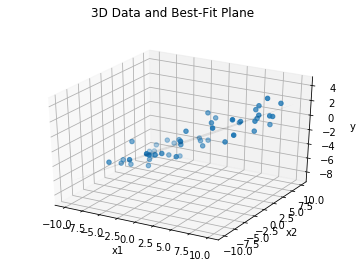

In [27]:
# Now let's use the function
plot_3d(model3, x1, x2, y)

# Exercise Option (Standard Difficulty)

Now, answer the following questions about `Fake Dataset 2`:
1. What output did you expect to see printed if the linear regression code was working, and why?
1. What did you expect to see on the graph if the linear regression code was working, and why?
1. Pick some lines of code that you could change to continue testing that the linear regression worked properly. What lines did you choose and how did you change them? How did the output change, and why does that tell you that the code is working correctly?
1. Explain any differences you noticed between working with dataset 1 and dataset 2.

In [28]:
### Your code here





# Exercise Option (Advanced)

First, look over and understand the data for `Fake Dataset 3`.

Then get the linear regression to work better for `Fake Dataset 3`. 

There are a couple different ways to do this, but all of them will involve some new code. If you have ideas but just aren't sure how to translate them into code, please ask for help!

### Fake Dataset 3

The new equation we'll try to model is $y = 0.7x^2 - 0.4x + 1.5$.


This dataset still just has one input, so the code is very similar to our first one. However, now the generating function is quadratic, so this one will be trickier to deal with.

Again, we'll go through dataset generation, training, and visualization.

In [29]:
# Generate some normally distributed noise
noise = numpy.random.normal(size=NUM_INPUTS)

# randomly pick numbers for x
x = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 1))

data2 = pd.DataFrame(data=x, columns=['x'])

In [30]:
# First, let's create some noise to make our data a little bit more spread out.

# generate some normally distributed noise
noise = numpy.random.normal(size=NUM_INPUTS)

In [31]:
# Let's generate the y values
# Our equation:
# y = 0.7x^2 - 0.4x + 1.5
data2['y'] = 0.7 * data2['x'] * data2['x'] - 0.4 * data2['x'] + 1.5 + noise


Intercept: [17.96324842]  Coefficients: [[-0.53639296]]


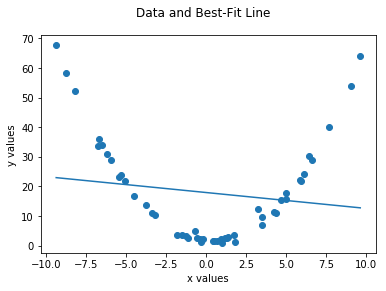

In [32]:
# get a 1D array of the input data
x = data2['x'].values.reshape(-1, 1)
y = data2['y'].values.reshape(-1, 1)

# Let's try use scikit-learn's linear regression model and fit to our data
model2 = linear_model.LinearRegression()
model2.fit(x, y)

# show results
print_model_fit(model2)
plot_best_fit_line(model2, x, y)

Hmmm. There's some issues here. Clearly the linear model that we have won't work great.

Your challenge is to write some new code that will figure out a way to nevertheless still fit a linear model to this data. There are a couple different ways to do this, but all of them will involve some new code. If you have ideas but just aren't sure how to translate them into code, please ask for help!

Intercept: [1.56718265]  Coefficients: [[0.70025791]]


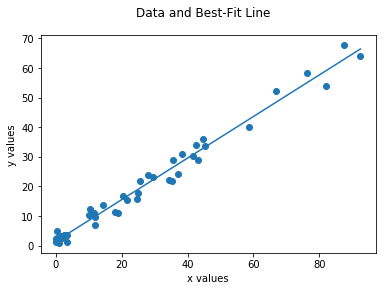

In [33]:
## #Your code here
data2['x2'] = data2['x'] * data2['x']
data2['y'] = 0.7 * data2['x2'] - 0.4 * data2['x'] + 1.5 + noise

y = data2['y'].values.reshape(-1, 1)
x2 = data2['x2'].values.reshape(-1, 1)


model2 = linear_model.LinearRegression()
model2.fit(x2, y)

# show results
print_model_fit(model2)
plot_best_fit_line(model2, x2, y)



# Exercise Option (Advanced)

Imagine you couldn't use the `sklearn` `.fit()` function to magically find the best parameters that minimized the sum of squared errors.

Imagine what life would be like if you had to write the code that found the best parameters to minimize "sum of squared errors" yourself! 

Geez. That would be hard ... or would it? 

Maybe a challenge worth persuing!

Your challenge: try to write some code that minimizes the sum of squared errors to find the parameters of a best fit linear regression line.



In [34]:
### Your code here

#function asks for x input list and y input list
def linear_regression(x,y):

    parameters = {'Intercept':0,'Coefficient':0}
    data = pd.DataFrame({'x':x,'y':y})
    x2 = list(data['x'] * data['x'])
    xy = list(data['x'] * data['y'])
    n = len(x)
    parameters = {'Intercept':0,'Coefficient':0}
    parameters['Coefficient'] = (sum(xy)*n-sum(x)*sum(y))/(sum(x2)*n-sum(x)*sum(x))
    parameters['Intercept'] = (sum(x2)*sum(y)-sum(x)*sum(xy))/(n*sum(x2)-sum(x)*sum(x))
    return parameters
    
    
print(linear_regression(list(data2['x2']),list(data2['y'])))





{'Intercept': 1.567182649237313, 'Coefficient': 0.7002579126695466}
